## Large Scale Final Project
Do Amazon voting behaviors reveal social conformity?
Chun Hu

### Category 2: Music

In [0]:
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Music/*.parquet')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1591214933999_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
Total Rows: 6177781
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
data.groupby('marketplace').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------+
|marketplace|  count|
+-----------+-------+
|         DE| 160599|
|         US|5530282|
|         UK| 330131|
|         FR|  72281|
|         JP|  84488|
+-----------+-------+

In [0]:
data = data.withColumn('helpful_ratio', (data.helpful_votes / data.total_votes).cast("float"))
data = data.filter('helpful_ratio IS NOT NULL')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_rating = data.groupBy('product_id').avg('star_rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_music = data.join(avg_rating, on=['product_id'], how='left_outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_music[['product_id', 'star_rating', 'helpful_ratio', 'avg(star_rating)']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------+-------------+----------------+
|product_id|star_rating|helpful_ratio|avg(star_rating)|
+----------+-----------+-------------+----------------+
|0005465079|          5|          1.0|             5.0|
|0195178564|          5|         0.75|             5.0|
|0199263094|          4|          0.6|             4.0|
|0199263094|          4|          0.6|             4.0|
|0517585480|          5|          1.0|             5.0|
|0684873206|          5|    0.6666667|             5.0|
|0764323636|          5|   0.71428573|             5.0|
|0764323636|          5|   0.71428573|             5.0|
|0807818283|          5|   0.78571427|             5.0|
|0807818283|          5|   0.78571427|             5.0|
|0819815586|          5|          1.0|             5.0|
|0936861339|          5|          0.6|             5.0|
|0949789933|          5|          1.0|             5.0|
|0972179917|          5|          1.0|             5.0|
|0972179933|          5|          1.0|          

In [0]:
data_music = data_music.withColumn('avg_rating', data_music["avg(star_rating)"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Descriptive Statistics of products in MUSIC category:

In [0]:
data_music[['avg_rating']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        avg_rating|
+-------+------------------+
|  count|           4042884|
|   mean| 4.296520008983734|
| stddev|0.5644015619358442|
|    min|               1.0|
|    25%|               4.0|
|    50%|  4.39344262295082|
|    75%| 4.666666666666667|
|    max|               5.0|
+-------+------------------+

In [0]:
data_music[['helpful_votes']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|     helpful_votes|
+-------+------------------+
|  count|           4042884|
|   mean|  4.21718975859807|
| stddev|10.167566223075594|
|    min|                 0|
|    25%|                 1|
|    50%|                 2|
|    75%|                 4|
|    max|              2181|
+-------+------------------+

In [0]:
from  pyspark.sql.functions import abs

data_music = data_music.withColumn('rating_diff', abs(data_music.avg_rating - data_music.star_rating).cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_music[['product_id', 'helpful_ratio', 'rating_diff']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+-----------+
|product_id|helpful_ratio|rating_diff|
+----------+-------------+-----------+
|0005465079|          1.0|        0.0|
|0195178564|         0.75|        0.0|
|0199263094|          0.6|        0.0|
|0199263094|          0.6|        0.0|
|0517585480|          1.0|        0.0|
|0684873206|    0.6666667|        0.0|
|0764323636|   0.71428573|        0.0|
|0764323636|   0.71428573|        0.0|
|0807818283|   0.78571427|        0.0|
|0807818283|   0.78571427|        0.0|
|0819815586|          1.0|        0.0|
|0936861339|          0.6|        0.0|
|0949789933|          1.0|        0.0|
|0972179917|          1.0|        0.0|
|0972179933|          1.0|        0.0|
|0972433503|          1.0|        0.0|
|0979811902|          1.0|        0.0|
|0980357373|          1.0|        0.0|
|0980357373|          1.0|        0.0|
|0980357373|          1.0|        0.0|
+----------+-------------+-----------+
only showing top 20 rows

In [0]:
sc.install_pypi_package("seaborn")
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/5f/1b6e0efab4bfb738478919d40b0e3e1a06e3d9996da45eb62a77e9a090d9/pandas-1.0.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

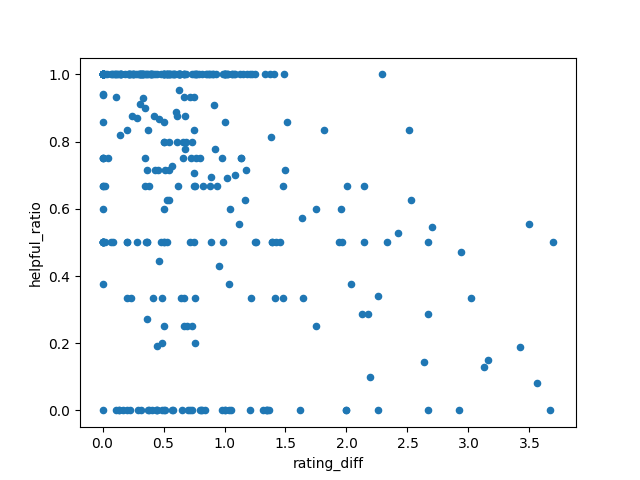

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = data_music.sample(fraction=0.0001).toPandas()
sampled_df.plot.scatter('rating_diff', 'helpful_ratio')
%matplot plt

We see that reviews are scattered at low rating differences and high helpfulness ratios.

In [0]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        inputCol="helpful_ratio", outputCol="ratio_buckets")
music_buck = bucketizer.setHandleInvalid("keep").transform(data_music)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

t = {0.0:"0.1", 1.0:"0.2", 2.0:"0.3", 3.0:"0.4", 4.0:"0.5", 5.0:"0.6", 6.0:"0.7", 7.0:"0.8", 8.0:"0.9", 9.0:"1.0"}
udf_foo = udf(lambda x: t[x], StringType())
music_buck = music_buck.withColumn("helpfulness_ratio", udf_foo("ratio_buckets"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_df = (music_buck.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_df.filter(avg_df.helpfulness_ratio != '0.1')
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+
|helpfulness_ratio|   avg(rating_diff)|
+-----------------+-------------------+
|              1.0|0.46388157342359493|
|              0.9| 0.6187105372398236|
|              0.8| 0.7329351541802753|
|              0.7| 0.7952132992474796|
|              0.6| 0.8195529773116856|
|              0.5|   1.33949051708086|
|              0.4| 1.1795959664108882|
|              0.3|  1.467828445787607|
|              0.2| 1.9119290905970887|
+-----------------+-------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

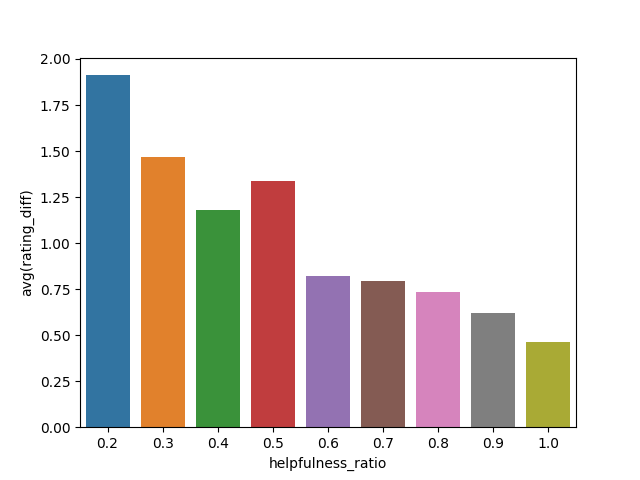

In [0]:
plt.close()

sns.barplot(x='helpfulness_ratio', y='avg(rating_diff)', data=avg_df.toPandas())
%matplot plt

The barplot shows that as helpfulness ratio increases, the difference between review rating and average product rating decreases. This confirms our hypothesis that there is social conformity in voting behaviors.

### By Marketplace
Do different marketplaces (or countries) have different trends?

In [0]:
music_buck.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- product_id: string (nullable = true)
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- helpful_ratio: float (nullable = true)
 |-- avg(star_rating): double (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- rating_diff: float (nullable = true)
 |-- ratio_buckets: double (nullable = true)
 |-- helpfulness_ratio: string (nullable = true)

In [0]:
us_music = music_buck.filter(music_buck.marketplace == 'US')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_us = (us_music.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_us.filter(avg_us.helpfulness_ratio != '0.1')
avg_df = avg_df.withColumn('diff', avg_df["avg(rating_diff)"])
avg_df = avg_df.selectExpr("helpfulness_ratio as helpfulness_ratio", "diff as US")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+
|helpfulness_ratio|                 US|
+-----------------+-------------------+
|              1.0|0.45820013525114295|
|              0.9| 0.6223629307253562|
|              0.8| 0.7441895452518562|
|              0.7| 0.8058175213156568|
|              0.6| 0.8248253987952958|
|              0.5| 1.3972216915946234|
|              0.4|  1.207343698483641|
|              0.3| 1.5160046868067854|
|              0.2| 1.9725833336102825|
+-----------------+-------------------+

In [0]:
uk_music = music_buck.filter(music_buck.marketplace == 'UK')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_uk = (uk_music.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_uk = avg_uk.filter(avg_uk.helpfulness_ratio != '0.1')
avg_uk = avg_uk.withColumn('diff', avg_uk["avg(rating_diff)"])
avg_df = avg_df.join(avg_uk, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "diff as UK")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+------------------+
|helpfulness_ratio|                 US|                UK|
+-----------------+-------------------+------------------+
|              1.0|0.45820013525114295|0.5648219824448493|
|              0.9| 0.6223629307253562| 0.623138081547793|
|              0.8| 0.7441895452518562|0.7436177884039726|
|              0.7| 0.8058175213156568|0.8120383102524047|
|              0.6| 0.8248253987952958|0.8416150419138124|
|              0.5| 1.3972216915946234|1.3927449845514273|
|              0.4|  1.207343698483641|1.1782258163851842|
|              0.3| 1.5160046868067854|1.5151519285076775|
|              0.2| 1.9725833336102825|2.0594904290134854|
+-----------------+-------------------+------------------+

In [0]:
de_music = music_buck.filter(music_buck.marketplace == 'DE')

avg_de = (de_music.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_de = avg_de.filter(avg_de.helpfulness_ratio != '0.1')
avg_de = avg_de.withColumn('diff', avg_de["avg(rating_diff)"])
avg_df = avg_df.join(avg_de, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "diff as DE")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------------------+------------------+------------------+
|helpfulness_ratio|                 US|                UK|                DE|
+-----------------+-------------------+------------------+------------------+
|              1.0|0.45820013525114295|0.5648219824448493|0.5569234639011231|
|              0.9| 0.6223629307253562| 0.623138081547793|0.6135353688492013|
|              0.8| 0.7441895452518562|0.7436177884039726|0.7184545051052896|
|              0.7| 0.8058175213156568|0.8120383102524047|0.7895883645102691|
|              0.6| 0.8248253987952958|0.8416150419138124|0.8139841100485287|
|              0.5| 1.3972216915946234|1.3927449845514273|1.1833890962817553|
|              0.4|  1.207343698483641|1.1782258163851842|1.0895317798764397|
|              0.3| 1.5160046868067854|1.5151519285076775|1.2359240426588987|
|              0.2| 1.9725833336102825|2.0594904290134854|1.5647639829063005|
+-----------------+-------------------+------------------+------

In [0]:
fr_music = music_buck.filter(music_buck.marketplace == 'FR')

avg_fr = (fr_music.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_fr = avg_fr.filter(avg_fr.helpfulness_ratio != '0.1')
avg_fr = avg_fr.withColumn('diff', avg_fr["avg(rating_diff)"])
avg_df = avg_df.join(avg_fr, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "diff as FR")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
jp_music = music_buck.filter(music_buck.marketplace == 'JP')

avg_jp = (jp_music.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_jp = avg_jp.filter(avg_jp.helpfulness_ratio != '0.1')
avg_jp = avg_jp.withColumn('diff', avg_jp["avg(rating_diff)"])
avg_df = avg_df.join(avg_jp, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "FR", "diff as JP")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

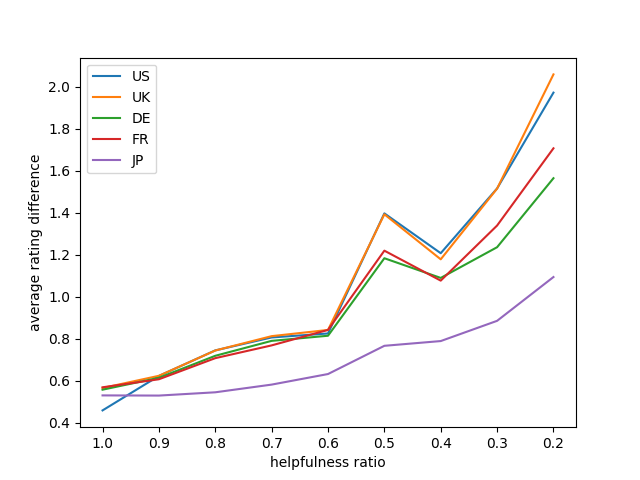

In [0]:
# plot for all countries
plt.close()

US, = plt.plot('helpfulness_ratio', 'US', data=avg_df.toPandas(), label="US")
UK, = plt.plot('helpfulness_ratio', 'UK', data=avg_df.toPandas(), label="UK")
DE, = plt.plot('helpfulness_ratio', 'DE', data=avg_df.toPandas(), label="DE")
FR, = plt.plot('helpfulness_ratio', 'FR', data=avg_df.toPandas(), label="FR")
JP, = plt.plot('helpfulness_ratio', 'JP', data=avg_df.toPandas(), label="JP")
plt.legend(handles=[US, UK, DE, FR, JP])
plt.xlabel('helpfulness ratio')
plt.ylabel('average rating difference')
%matplot plt

Similar to trends in Book category, the lineplot shows that voting behaviors in all marketplaces reveal trends for social conformity. We also reviews in Japan have more gentle increase in average rating difference compared to those in other marketplaces. This is a potential evidence that collectivist countries tend to show higher conformity. However, we need more data and analysis to validate our results.

### Sentiment Analysis
What are some characteristics of reviews that have high or low helpfulness ratio?

In [1]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.5.1

# Quick SparkSession start
import sparknlp
spark = sparknlp.start()

print("Spark NLP version")
sparknlp.version()
print("Apache Spark version")
spark.version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
     |████████████████████████████████| 215.7MB 52kB/s 
     |████████████████████████████████| 204kB 44.1MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130388 sha256=0c5a9f295fab77a3a6bb7280815267d2ede682648314cc03a9ffde5662ba4c3a
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark
     |████████████████████████████████| 122kB 3.5MB/s 
Spark NLP version
Apache Spark version


'2.4.4'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import glob
import pandas as pd

file_path = glob.glob("/content/drive/My Drive/amazon-reviews-dataset/*")
file = file_path[4]

with open(file) as tsvfile:
    col_names = ["marketplace", "customer_id", "review_id", "product_id", "product_parent", "product_title",
               "category", "star_rating", "helpful_votes", "total_votes", "vine", "verified_purchase", 
               "review_headline", "review_body", "review_date"]
    data = pd.read_csv(file, sep='\t', names=col_names, skiprows=1000000, low_memory=False)

In [8]:
data['helpful_ratio'] = data['helpful_votes'] / data['total_votes']
data = data[data['helpful_ratio'].notnull()]
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_ratio
1,US,12112602,R3PDTOL0C6OZHY,B00DTXB9EG,102242184,Scream for Love,Music,1,3.0,3.0,N,N,Probably the worst artist releasing music righ...,Don't waste your money or time on this garbage...,2014-03-03,1.0
9,US,47627544,R3133ZF6V9233E,B00005AURI,88824676,Snoopy's Classiks: Animal Party,Music,5,1.0,1.0,N,Y,snoopy cd,I love it and all the children in my class lov...,2014-03-03,1.0
15,US,12215461,R2BF3NSFIIIHN8,B00008J2DQ,230104644,Faceless,Music,5,1.0,1.0,N,Y,sweet,girlfriend just got into godsmack. didnt have ...,2014-03-03,1.0
16,US,44832598,R2LB2GULRAED49,B006IIA1N4,263028915,Liquid Crystal Project 3,Music,5,2.0,2.0,N,Y,Good music,It's awesome and I would recommend it to anyon...,2014-03-03,1.0
17,US,15426850,RJ7PTYFDKI8ZD,B000002AJJ,780988582,If I Ruled the World - Songs for the Jet Set,Music,5,3.0,3.0,N,Y,"They Just Don't Make 'Em Like This, Anymore","I am a professional musician, specializing in ...",2014-03-03,1.0


In [10]:
most_helpful = data[data['helpful_ratio'] == 1.0]
most_helpful.shape

(1285783, 16)

In [11]:
least_helpful = data[data['helpful_ratio'] <= 0.2]
least_helpful.shape

(376617, 16)

In [0]:
from sklearn.utils import shuffle
most_helpful = shuffle(most_helpful)[:10000]
least_helpful = shuffle(least_helpful)[:10000]

In [13]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('analyze_sentiment', lang='en')
most_helpful['sentiment'] = most_helpful['review_body'].apply(pipeline.annotate)

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [0]:
most_helpful['bin'] = most_helpful.sentiment.apply(lambda x: x['sentiment'][0])
most_helpful['sentiment_value'] = most_helpful.bin.astype("category").cat.codes - 1

In [15]:
most_helpful['sentiment_value'].mean()

0.4727

In [0]:
least_helpful['sentiment'] = least_helpful['review_body'].apply(pipeline.annotate)

In [0]:
least_helpful['bin'] = least_helpful.sentiment.apply(lambda x: x['sentiment'][0])
least_helpful['sentiment_value'] = least_helpful.bin.astype("category").cat.codes - 1

In [18]:
least_helpful['sentiment_value'].mean()

0.4799

Helpful reviews and unhelpful reviews have similar sentiment values.

### TF-IDF
What are the top terms in helpful and unhelpful reviews?

In [0]:
most_helpful = data[data['helpful_ratio'] == 1.0]
least_helpful = data[data['helpful_ratio'] < 0.2]
most_helpful = shuffle(most_helpful)[:10000][['review_body']]
least_helpful = shuffle(least_helpful)[:10000][['review_body']]

In [0]:
from pyspark.sql import SparkSession
# start spark session configured for spark nlp
spark = SparkSession.builder.master('local[*]').getOrCreate()

spark_helpful = spark.createDataFrame(most_helpful)
spark_unhelpful = spark.createDataFrame(least_helpful)

In [0]:
from pyspark.ml.feature import *
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="review_body", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
countVect = CountVectorizer(inputCol="filtered", outputCol="cv",  minDF=5.0)
idf = IDF(inputCol="cv", outputCol="idf")
pipeline = Pipeline(stages=[tokenizer, remover, countVect, idf])

Helpful Reviews

In [0]:
helpful = pipeline.fit(spark_helpful).transform(spark_helpful)

In [23]:
helpful.select("filtered", "idf").show()

+--------------------+--------------------+
|            filtered|                 idf|
+--------------------+--------------------+
|[first, album, pu...|(15233,[1,2,4,11,...|
|[griegs, piano, c...|(15233,[0,2,6,8,1...|
|[return, cd., , f...|(15233,[0,3,4,18,...|
|[pleasure, living...|(15233,[0,4,5,17,...|
|[neil, tim, finn,...|(15233,[0,1,6,7,1...|
|[looking, long, i...|(15233,[12,29,35,...|
|[spirit, fiddle, ...|(15233,[0,2,3,10,...|
|[3, cd, box, set,...|(15233,[5,35,92,9...|
|[first, off,, bou...|(15233,[2,3,5,12,...|
|[immaculate, perf...|(15233,[3,6,12,16...|
|[chose, rememberi...|(15233,[4,30,60,7...|
|[often, compilati...|(15233,[0,2,20,21...|
|[couple, kabib, k...|(15233,[0,2,4,7,2...|
|[relaxing,, prett...|(15233,[3,4,16,14...|
|[absolutely, enjo...|(15233,[0,2,5,7,1...|
|[singers, come, g...|(15233,[2,3,5,6,9...|
|['pull, in', sple...|(15233,[0,2,3,6,1...|
|[first, watched, ...|(15233,[1,3,5,12,...|
|[college,, knew, ...|(15233,[1,2,3,6,1...|
|[without, doubt,,...|(15233,[0,

In [0]:
helpful_df = helpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in helpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in helpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [28]:
for i in indices[:15]:
    print(words[i])

elvis
repeating:
new
days
album.<br>this
/>i
good
/><br
way
fan.
truly
left
disappointed
song!<br
<br


Not Helpful Text

In [0]:
unhelpful = pipeline.fit(spark_unhelpful).transform(spark_unhelpful)

In [0]:
unhelpful_df = unhelpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in unhelpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in unhelpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [33]:
for i in indices[:15]:
    print(words[i])

smoking
may
inquiry
graying
(in
record
en
shows
jimmy
main
every
intelligent
bands
sticky
anyway.
